## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.2,0.4,0.6,0.8,0.95]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentm-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.0082 - acc: 0.2822 - val_loss: 1.9041 - val_acc: 0.3023
Epoch 2/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.8365 - acc: 0.3469 - val_loss: 1.8622 - val_acc: 0.3085
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7694 - acc: 0.3736 - val_loss: 1.7231 - val_acc: 0.3977
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7119 - acc: 0.3978 - val_loss: 1.7276 - val_acc: 0.3901
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6777 - acc: 0.4084 - val_loss: 1.6493 - val_acc: 0.4247
Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.6419 - acc: 0.4228 - val_loss: 1.6939 - val_acc: 0.3992
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6096 - acc: 0.4320 - val_loss: 1.6981 - val_acc

50000/50000 [==============================] - 4s 79us/step - loss: 1.7932 - acc: 0.3671 - val_loss: 1.8685 - val_acc: 0.3269
Epoch 3/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7146 - acc: 0.3954 - val_loss: 1.7697 - val_acc: 0.3603
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6561 - acc: 0.4160 - val_loss: 1.6264 - val_acc: 0.4255
Epoch 5/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.6169 - acc: 0.4284 - val_loss: 1.7729 - val_acc: 0.3618
Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5747 - acc: 0.4443 - val_loss: 1.6276 - val_acc: 0.4250
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5506 - acc: 0.4530 - val_loss: 1.5378 - val_acc: 0.4518
Epoch 8/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5195 - acc: 0.4646 - val_loss: 1.6163 - val_acc: 0.4266
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 80us/step - loss: 1.6390 - acc: 0.4195 - val_loss: 1.6560 - val_acc: 0.4112
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5761 - acc: 0.4425 - val_loss: 1.6227 - val_acc: 0.4197
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5248 - acc: 0.4608 - val_loss: 1.5487 - val_acc: 0.4489
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4809 - acc: 0.4754 - val_loss: 1.5648 - val_acc: 0.4408
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4489 - acc: 0.4866 - val_loss: 1.5789 - val_acc: 0.4362
Epoch 8/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4184 - acc: 0.4977 - val_loss: 1.4380 - val_acc: 0.4890
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3864 - acc: 0.5128 - val_loss: 1.4895 - val_acc: 0.4652
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 80us/step - loss: 1.4524 - acc: 0.4842 - val_loss: 1.4996 - val_acc: 0.4698
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3998 - acc: 0.5018 - val_loss: 1.4700 - val_acc: 0.4745
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.3646 - acc: 0.5158 - val_loss: 1.4413 - val_acc: 0.4815
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.3331 - acc: 0.5275 - val_loss: 1.4741 - val_acc: 0.4791
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2989 - acc: 0.5397 - val_loss: 1.4053 - val_acc: 0.4976
Epoch 9/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2658 - acc: 0.5499 - val_loss: 1.3643 - val_acc: 0.5167
Epoch 10/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2347 - acc: 0.5629 - val_loss: 1.3887 - val_acc: 0.5005
Epoch 11/50
50000/50000 [==========================

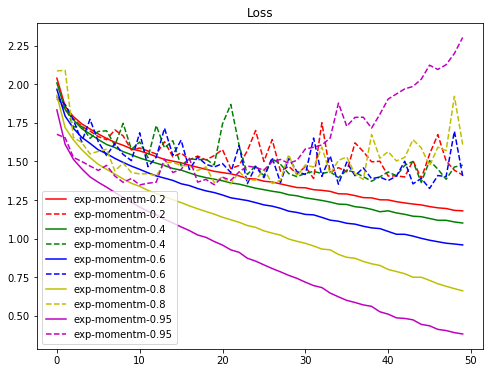

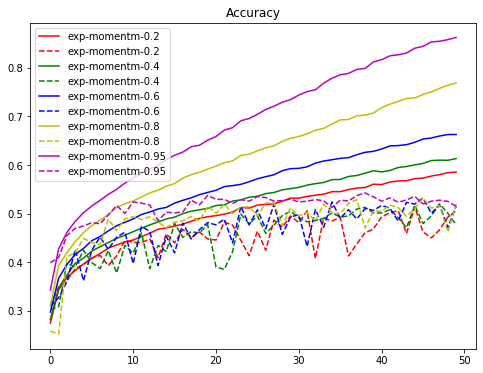

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
#Without nesterov
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentm-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Momentum = 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9931 - acc: 0.2873 - val_loss: 1.8887 - val_acc: 0.3231
Epoch 2/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8204 - acc: 0.3583 - val_loss: 1.7913 - val_acc: 0.3633
Epoch 3/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7472 - acc: 0.3851 - val_loss: 1.7952 - val_acc: 0.3657
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6991 - acc: 0.4025 - val_loss: 1.6958 - val_acc: 0.3958
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6544 - acc: 0.4196 - val_loss: 1.6252 - val_acc: 0.4290
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6176 - acc: 0.4306 - val_loss: 1.6423 - val_acc: 0.4238
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.5892 - acc: 0.4389 - val_loss: 1.6172 - val_acc

50000/50000 [==============================] - 4s 76us/step - loss: 1.7717 - acc: 0.3723 - val_loss: 1.7210 - val_acc: 0.3817
Epoch 3/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6912 - acc: 0.4038 - val_loss: 1.7474 - val_acc: 0.3787
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.6334 - acc: 0.4230 - val_loss: 1.6275 - val_acc: 0.4168
Epoch 5/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.5910 - acc: 0.4388 - val_loss: 1.6748 - val_acc: 0.4015
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5580 - acc: 0.4489 - val_loss: 1.5435 - val_acc: 0.4494
Epoch 7/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.5271 - acc: 0.4625 - val_loss: 1.6040 - val_acc: 0.4287
Epoch 8/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.4980 - acc: 0.4728 - val_loss: 1.5111 - val_acc: 0.4617
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 4s 75us/step - loss: 1.6254 - acc: 0.4232 - val_loss: 1.6305 - val_acc: 0.4219
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5650 - acc: 0.4454 - val_loss: 1.6245 - val_acc: 0.4186
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5183 - acc: 0.4605 - val_loss: 1.5001 - val_acc: 0.4662
Epoch 6/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.4799 - acc: 0.4742 - val_loss: 1.4971 - val_acc: 0.4700
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4476 - acc: 0.4877 - val_loss: 1.4876 - val_acc: 0.4651
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4213 - acc: 0.4961 - val_loss: 1.5412 - val_acc: 0.4451
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3961 - acc: 0.5053 - val_loss: 1.4498 - val_acc: 0.4846
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 75us/step - loss: 1.5342 - acc: 0.4509 - val_loss: 1.5324 - val_acc: 0.4548
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4829 - acc: 0.4723 - val_loss: 1.4960 - val_acc: 0.4612
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4599 - acc: 0.4786 - val_loss: 1.4960 - val_acc: 0.4616
Epoch 7/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4087 - acc: 0.4998 - val_loss: 1.4964 - val_acc: 0.4616
Epoch 8/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4050 - acc: 0.4976 - val_loss: 1.4398 - val_acc: 0.4878
Epoch 9/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3731 - acc: 0.5090 - val_loss: 1.4460 - val_acc: 0.4851
Epoch 10/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3401 - acc: 0.5211 - val_loss: 1.3955 - val_acc: 0.5037
Epoch 11/50
50000/50000 [==========================

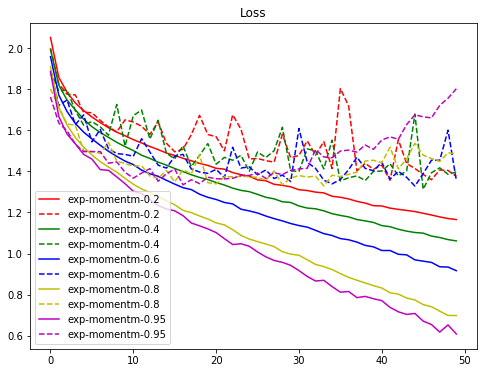

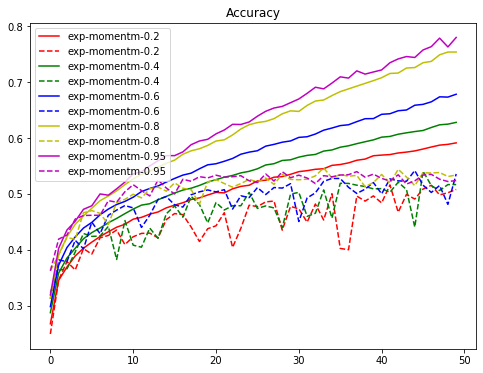

In [19]:
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()